# Análisis por lógica difusa

Acá se hace una prueba para ver cómo se obtiene un solo valor de fuerza usando la lógica difusa.
El ejemplo comienza en el título "Evaluar reglas"

## Importaciones

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product #Usado para crear las posibles combinaciones de reglas


## Conjuntos Borrosos

### Función

In [74]:

# La función particiones_borrosas calcula la membresía para cada conjunto
# Estas particiones borrosas tienen un 50% de solapamiento
def particiones_borrosas(valor, picos, ancho):
    n_particiones = 5 #Cantidad de particiones borrosas
    membresia = []
    
    for i in range(n_particiones):
        if valor <= picos[i] - ancho or valor >= picos[i] + ancho:
            membresia.append(0)
        elif picos[i] - ancho <= valor <= picos[i]:
            membresia.append((valor - (picos[i] - ancho)) / ancho)
        elif picos[i] <= valor <= picos[i] + ancho:
            membresia.append((picos[i] + ancho - valor) / ancho)
        else:
            membresia.append(1)
    
    return membresia

### Variable de entrada: ángulo

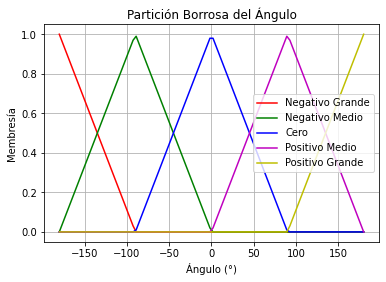

In [75]:
n=100 #Cantidad de puntos

angulo_max = 180
angulo_min = -angulo_max

picos_angulos = [angulo_min, angulo_min/2, 0, angulo_max/2, angulo_max]
ancho_angulos = 90

# Generar datos de ángulo entre -180° y 180°
angulos = np.linspace(angulo_min, angulo_max, n)

# Calcular la membresía para cada ángulo
membresia_angulos = [particiones_borrosas(angulo, picos_angulos, ancho_angulos) for angulo in angulos]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(angulos, [m[i] for m in membresia_angulos], label=conjuntos[i], color=colores[i])

plt.xlabel('Ángulo (°)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa del Ángulo')
plt.legend()
plt.grid(True)
plt.show()


### Variable de entrada: velocidad angular

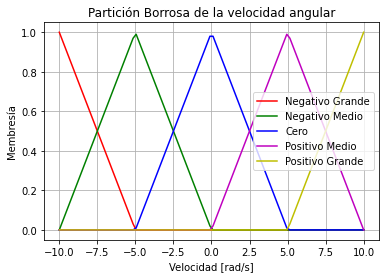

In [76]:
v_max = 10
v_min = -v_max
picos_v = [v_min, v_min/2, 0, v_max/2, v_max]
ancho_v = v_max/2

# Datos de fuerzas entre -10 y 10
velocidades = np.linspace(v_min, v_max, n)

#Calcular membresía para cada velocidad
membresia_velocidades = [particiones_borrosas(velocidad, picos_v, ancho_v) for velocidad in velocidades]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(velocidades, [m[i] for m in membresia_velocidades], label=conjuntos[i], color=colores[i])

plt.xlabel('Velocidad [rad/s]')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la velocidad angular')
plt.legend()
plt.grid(True)
plt.show()

### Variable de salida: fuerza

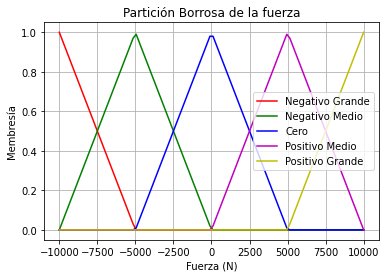

In [77]:
f_max = 10000
f_min = -f_max

picos_f = [f_min, f_min/2, 0, f_max/2, f_max]
ancho_f = f_max/2

# Datos de fuerzas entre -2 y 2
fuerzas = np.linspace(f_min, f_max, n)

#Calcular membresía para cada fuerza
membresia_fuerzas = [particiones_borrosas(fuerza, picos_f, ancho_f) for fuerza in fuerzas]

# Graficar los conjuntos borrosos
conjuntos = ['Negativo Grande', 'Negativo Medio', 'Cero', 'Positivo Medio', 'Positivo Grande']
colores = ['r', 'g', 'b', 'm', 'y']

for i in range(len(conjuntos)):
    plt.plot(fuerzas, [m[i] for m in membresia_fuerzas], label=conjuntos[i], color=colores[i])

plt.xlabel('Fuerza (N)')
plt.ylabel('Membresía')
plt.title('Partición Borrosa de la fuerza')
plt.legend()
plt.grid(True)
plt.show()

## Valores interpolados

He establecido una subdivisión de n elementos en cada membresía (o sea que cada membresía tiene n elementos). Si tengo un ángulo de 45°, por ejemplo, necesito convertir este valor a un índice correspondiente sabiendo que los ángulos van de -180° a 180° y que los índices van de 0 a 99.

In [78]:
#Convierto un ángulo a un valor entre -180 y 180°. Por ejemplo, un ángulo de 190° sería lo mismo que -170°
def ajustar_rango_angulo(angulo):
    while angulo > 180:
        angulo -= 360
    while angulo < -180:
        angulo += 360
    return angulo

#El dominio está discretizado en n puntos. El objetivo es determinar a qué punto de esa discretización pertenece un ángulo en particular
def indice_valor(valor, val_min, val_max, n):
    rango_origen = val_max - (val_min)  # Rango total del valor de origen (-180 a 180)
    rango_destino = n-1  # Rango total del valor de destino (0 a 99)

    # Calculamos la fracción del valor de origen
    fraccion = (valor - (val_min)) / rango_origen

    # Aplicamos la interpolación lineal
    valor_interpolado = fraccion * rango_destino

    # Redondeamos el resultado y lo convertimos a entero
    valor_interpolado = int(round(valor_interpolado))

    # Aseguramos que el valor interpolado esté dentro del rango de destino (0 a n-1)
    valor_interpolado = max(0, min(n-1, valor_interpolado))

    return valor_interpolado

In [79]:
''' Ejemplo ángulo de 0° '''

angulo_entrada = 0
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y n-1 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(f"Membrecía ángulo entrada: {membresia_angulos[angulo_entrada_interpolado]}")

'''Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'''

Ángulo entrada: 0
Angulo ajustado al rango: 0
Ángulo entrada indice: 50
Membrecía ángulo entrada: [0, 0, 0.9797979797979799, 0.020202020202020145, 0]


'Vemos que el resultado tiene sentido ya que casi el 100% pertenece al conjunto Cero'

In [80]:
''' Ejemplo ángulo 180° '''

angulo_entrada = 180
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'''

Ángulo entrada: 180
Angulo ajustado al rango: 180
Ángulo entrada indice: 99
[0, 0, 0, 0, 1.0]


'Vemos que el resultado tiene sentido ya que el 100% pertenece al conjunto Positivo Alto'

In [81]:
''' Ejemplo ángulo 190° '''

angulo_entrada = 190
print(f"Ángulo entrada: {angulo_entrada}")

#Llevo al ángulo a un rango entre -180° y 180°
angulo_ajustado = ajustar_rango_angulo(angulo_entrada)
print(f"Angulo ajustado al rango: {angulo_ajustado}")

#Lo convierto el ángulo a un numero entre 0 y 100 para encontrar a cual value_member pertenece
angulo_entrada_interpolado = indice_valor(angulo_ajustado, -180, 180, n)
print(f"Ángulo entrada indice: {angulo_entrada_interpolado}")

#Vemos la membrecía del ángulo interpolado 
print(membresia_angulos[angulo_entrada_interpolado])

'''En este caso, vemos que el +190 se convierte primero a -170° y luego podemos ver que pertenece en un 88% al Negativo Grande y en un 12% a Negativo Medio '''

Ángulo entrada: 190
Angulo ajustado al rango: -170
Ángulo entrada indice: 3
[0.8787878787878788, 0.12121212121212119, 0, 0, 0]


'En este caso, vemos que el +190 se convierte primero a -170° y luego podemos ver que pertenece en un 88% al Negativo Grande y en un 12% a Negativo Medio '

In [82]:
''' Ejemplo velocidad 5 '''

v_entrada = 15
print(f"Velocidad entrada: {v_entrada}")

#Lo convierto la velocidad a un numero entre 0 y 100 para encontrar a cual value_member pertenece
v_entrada_interpolado = indice_valor(v_entrada, -10, 10, n)
print(f"Velocidad entrada indice: {v_entrada_interpolado}")

#Vemos la membrecía de la velocidad interpolada 
print(f"Velocidad entrada membresía: {membresia_velocidades[v_entrada_interpolado]}")

'''Pertenece un 60% a Positivo Medio y un 40% a Positivo Grande '''

Velocidad entrada: 15
Velocidad entrada indice: 99
Velocidad entrada membresía: [0, 0, 0, 0, 1.0]


'Pertenece un 60% a Positivo Medio y un 40% a Positivo Grande '

In [83]:
''' Ejemplo velocidad 15 '''

v_entrada = 15
print(f"Velocidad entrada: {v_entrada}")

#Lo convierto la velocidad a un numero entre 0 y 100 para encontrar a cual value_member pertenece
v_entrada_interpolado = indice_valor(v_entrada, -10, 10, n)
print(f"Ángulo entrada indice: {v_entrada_interpolado}")

#Vemos la membrecía de la velocidad interpolada 
print(membresia_velocidades[v_entrada_interpolado])

'''Si sobrepasa al máximo, pertenece 100% a Positivo Grande '''

Velocidad entrada: 15
Ángulo entrada indice: 99
[0, 0, 0, 0, 1.0]


'Si sobrepasa al máximo, pertenece 100% a Positivo Grande '

## Reglas

In [84]:
def evaluar_regla(regla, angulo, velocidad):  # Función para evaluar una regla
    if regla["angulo"] == angulo and regla["v"] == velocidad:
        return regla["fuerza"]
    else:
        return None

In [85]:
'''Defino las reglas a usar en un diccionario'''

reglas = {
    1: {"angulo": "Negativo Grande",    "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    2: {"angulo": "Negativo Grande",    "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    3: {"angulo": "Negativo Grande",    "v": "Cero",                "fuerza": "Negativo Medio"},
    4: {"angulo": "Negativo Grande",    "v": "Positivo Medio",      "fuerza": "Negativo Medio"},
    5: {"angulo": "Negativo Grande",    "v": "Positivo Grande",     "fuerza": "Cero"},

    6: {"angulo": "Negativo Medio",     "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    7: {"angulo": "Negativo Medio",     "v": "Negativo Medio",      "fuerza": "Negativo Grande"},
    8: {"angulo": "Negativo Medio",     "v": "Cero",                "fuerza": "Negativo Medio"},
    9: {"angulo": "Negativo Medio",     "v": "Positivo Medio",      "fuerza": "Cero"},
    10: {"angulo": "Negativo Medio",    "v": "Positivo Grande",     "fuerza": "Cero"},

    11: {"angulo": "Cero",              "v": "Negativo Grande",     "fuerza": "Negativo Grande"},
    12: {"angulo": "Cero",              "v": "Negativo Medio",      "fuerza": "Negativo Medio"},
    13: {"angulo": "Cero",              "v": "Cero",                "fuerza": "Cero"},
    14: {"angulo": "Cero",              "v": "Positivo Medio",      "fuerza": "Positivo Medio"},
    15: {"angulo": "Cero",              "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    16: {"angulo": "Positivo Medio",    "v": "Negativo Grande",     "fuerza": "Cero"},
    17: {"angulo": "Positivo Medio",    "v": "Negativo Medio",      "fuerza": "Cero"},
    18: {"angulo": "Positivo Medio",    "v": "Cero",                "fuerza": "Positivo Medio"},
    19: {"angulo": "Positivo Medio",    "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    20: {"angulo": "Positivo Medio",    "v": "Positivo Grande",     "fuerza": "Positivo Grande"},

    21: {"angulo": "Positivo Grande",   "v": "Negativo Grande",     "fuerza": "Cero"},
    22: {"angulo": "Positivo Grande",   "v": "Negativo Medio",      "fuerza": "Positivo Medio"},
    23: {"angulo": "Positivo Grande",   "v": "Cero",                "fuerza": "Positivo Medio"},
    24: {"angulo": "Positivo Grande",   "v": "Positivo Medio",      "fuerza": "Positivo Grande"},
    25: {"angulo": "Positivo Grande",   "v": "Positivo Grande",     "fuerza": "Positivo Grande"}
}

# Ejemplo de evaluación de reglas
posicion_actual = "Negativo Medio"
velocidad_actual = "Negativo Medio"

for regla_id, regla in reglas.items():
    resultado = evaluar_regla(regla, posicion_actual, velocidad_actual)
    if resultado is not None:
        print(f"Regla {regla_id}: La fuerza es '{resultado}'")
        break

'''Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'''

Regla 7: La fuerza es 'Negativo Grande'


'Ejemplo suponiendo posicion_actual = "Negativo Medio" y velocidad_actual = "Negativo Medio"'

## Evaluar reglas

In [86]:
'''Ejemplo para para cierto ángulo y velocidad de entrada'''

angulo_entrada = 45
v_entrada = 7

print(f"Ángulo de entrada: {angulo_entrada}°")

angulo_ajustado = ajustar_rango_angulo(angulo_entrada)

print(f"Angulo ajustado: {angulo_ajustado}°")

angulo_entrada_interpolado = indice_valor(angulo_ajustado, angulo_min, angulo_max, n)
membresia_angulo_entrada = membresia_angulos[angulo_entrada_interpolado]
print(f"Membresias ángulo entrada: {membresia_angulo_entrada}\n")

v_entrada_interpolada = indice_valor(v_entrada, v_min, v_max, n)
membresia_v_entrada = membresia_velocidades[v_entrada_interpolada]
print(f"Velocidad de entrada: {v_entrada} rad/s")
print(f"Membresias velocidad entrada: {membresia_v_entrada}")

Ángulo de entrada: 45°
Angulo ajustado: 45°
Membresias ángulo entrada: [0, 0, 0.49494949494949514, 0.5050505050505049, 0]

Velocidad de entrada: 7 rad/s
Membresias velocidad entrada: [0, 0, 0, 0.6060606060606062, 0.39393939393939376]


In [87]:
''' Obtengo los pares de conjuntos a analizar '''

'''Cada ángulo se va a ver proyectado en dos de sus 5 conjuntos difusos. Lo mismo ocurrirá para la velocidad. Lo que hago acá es hacer la combinatoria entre los dos conjuntos del ángulo con los dos de la velocidad, de forma que queden 4 reglas a analizar.

Agrupo de a pares tanto el nombre del conjunto ángulo y velocidad, y también agrupo de a pares el valor que se le da al ángulo y velocidad en cada uno de estos conjuntos'''
def obtener_pares(membresia_angulos, membresia_velocidades, conjuntos):

    # Obtener los índices de los elementos no cero en cada lista
    indices_l1 = [i for i, elem in enumerate(membresia_angulos) if elem != 0]
    indices_l2 = [i for i, elem in enumerate(membresia_velocidades) if elem != 0]

    # Realizar la combinación entre los índices
    combinaciones = list(product(indices_l1, indices_l2))

    # Obtener los pares de elementos correspondientes a las combinaciones
    pares_valores = [(membresia_angulos[i], membresia_velocidades[j]) for i, j in combinaciones]
    pares_conjuntos = [(conjuntos[i], conjuntos[j]) for i, j in combinaciones]

    # Imprimir los pares resultantes
    # for i in range(len(pares_valoeres)):
    #     print(pares_conjuntos[i])
    #     print(pares_valores[i])

    return pares_valores, pares_conjuntos

pares_valores, pares_conjuntos = obtener_pares(membresia_angulo_entrada, membresia_v_entrada, conjuntos)

#Imprimir los pares resultantes
for i in range(len(pares_valores)):
    print(f"Conjunto Angulo - Velocidad: {pares_conjuntos[i]}")
    print(f"Valores  Angulo - Velocidad: {pares_valores[i]}\n")

'''Vemos que tenemos todas las combinaciones de conjunto conjunto y de valor valor'''

Conjunto Angulo - Velocidad: ('Cero', 'Positivo Medio')
Valores  Angulo - Velocidad: (0.49494949494949514, 0.6060606060606062)

Conjunto Angulo - Velocidad: ('Cero', 'Positivo Grande')
Valores  Angulo - Velocidad: (0.49494949494949514, 0.39393939393939376)

Conjunto Angulo - Velocidad: ('Positivo Medio', 'Positivo Medio')
Valores  Angulo - Velocidad: (0.5050505050505049, 0.6060606060606062)

Conjunto Angulo - Velocidad: ('Positivo Medio', 'Positivo Grande')
Valores  Angulo - Velocidad: (0.5050505050505049, 0.39393939393939376)



'Vemos que tenemos todas las combinaciones de conjunto conjunto y de valor valor'

In [101]:
conjuntos_resultado = []
valores_pertenencia = []

#Para cada par de conjuntos, recorreré cada regla hasta dar con una que coincida a la situación
for i in range( len(pares_conjuntos) ):

   for regla_id, regla in reglas.items():
      
      resultado = evaluar_regla(regla, pares_conjuntos[i][0], pares_conjuntos[i][1])
      
      if resultado == None: #Es el caso la regla selecciconada no coincide con el caso analizado 
         pass #Paso a analizar la proxima regla
      
      elif not resultado in conjuntos_resultado: #Si se obtiene un resultado nuevo, se agrega sin problemas
         conjuntos_resultado.append(resultado)
         valores_pertenencia.append(min(pares_valores[i])) #Tomo el mínimo valor de pertenencia, ya que esto hace referencia a la intersección de conjuntos
         break

      #Puede ocurrir que se obtenga dos o más veces el MISMO conjunto de salida para la fuerza. En este caso, me quedo siempre con el que tenga el máximo valor ya que es la operación que indica la unión de conjuntos'''
      elif resultado in conjuntos_resultado:
         indice = conjuntos_resultado.index(resultado)

         if min(pares_valores[i]) > valores_pertenencia[indice]: #Comparo el que ya tenía con el nuevo y verifico que el nuevo sea mayor
            valores_pertenencia[indice]=min(pares_valores[i])
            break
         else:
            break
        
# Además convierto las reglas en una lista donde contenga los picos
picos_resultados = []

for conjunto in conjuntos_resultado:
    if conjunto == 'Negativo Grande':
      picos_resultados.append(picos_f[0])
    elif conjunto == 'Negativo Medio':
       picos_resultados.append(picos_f[1])
    elif conjunto == 'Cero':
       picos_resultados.append(picos_f[2])
    elif conjunto == 'Positivo Medio':
       picos_resultados.append(picos_f[3])
    elif conjunto == 'Positivo Grande':
       picos_resultados.append(picos_f[4])

#Printeo para ver que todo haya salido bien
for i in range( len(conjuntos_resultado) ):
   
   print(f"La fuerza es {conjuntos_resultado[i]}")
   print(f"El pico de dicho conjunto está en F={picos_resultados[i]} N")
   print(f"El valor de pertenencia es {valores_pertenencia[i]:0.3}\n")

La fuerza es Positivo Medio
El pico de dicho conjunto está en F=5000.0 N
El valor de pertenencia es 0.495

La fuerza es Positivo Grande
El pico de dicho conjunto está en F=10000 N
El valor de pertenencia es 0.505



## Desborrosificador: Media de centros

In [100]:
print(f"picos_resultados: {picos_resultados}")
print(f"valores_pertenencia: {valores_pertenencia}\n")

media_centros = np.average(picos_resultados, weights=valores_pertenencia)
print(f"La fuerza desborrosificada tiene un valor de {media_centros:0.6} N")


#Otra forma más rústica y casera de hacerla

# numerador = 0
# denominador = 0
# for i in range( len(valores_pertenencia) ):
#     numerador += valores_pertenencia[i]*picos_resultados[i]
#     denominador += valores_pertenencia[i]

# media_centros2 = numerador/denominador
# print(f"Casero: {media_centros2}")

picos_resultados: [5000.0, 10000]
valores_pertenencia: [0.49494949494949514, 0.5050505050505049]

La fuerza desborrosificada tiene un valor de 7525.25 N
